# Finding Heavy Traffic Indicators on I-94

I am going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

Goal of the project: to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd
station_recordings=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
#inspecting the dataset:
station_recordings

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [3]:
station_recordings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Plotting a histogram to examine the distribution of the traffic_volume column:

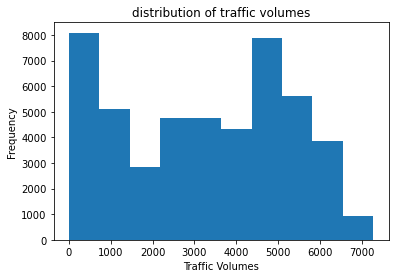

In [5]:
plt.hist(station_recordings['traffic_volume'])
plt.title('distribution of traffic volumes')
plt.xlabel('Traffic Volumes')
plt.ylabel('Frequency')
plt.show()

The distribution is neither a symmetric nor a skewed distribution.

In [6]:
station_recordings['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Previously, we analyzed the distribution of traffic_volume and found the following:

* About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
* About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

Transforming the 'date_time' column to datetime dtype:

In [7]:
station_recordings['date_time']=pd.to_datetime(station_recordings['date_time'])
daytime_data=station_recordings.loc[station_recordings['date_time'].dt.hour.between(7,18)]
nighttime_data=station_recordings.loc[station_recordings['date_time'].dt.hour.between(19,23) | station_recordings['date_time'].dt.hour.between(0,6)]

In [8]:
daytime_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


In [9]:
nighttime_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


Previously, we divided the dataset into two parts:

* Daytime data: hours from 7 AM to 7 PM (12 hours)
* Nighttime data: hours from 7 PM to 7 AM (12 hours)
    
Now we're going to compare the traffic volume at night and during day.

Plotting the histograms of 'traffic_volume' column for both day and night.

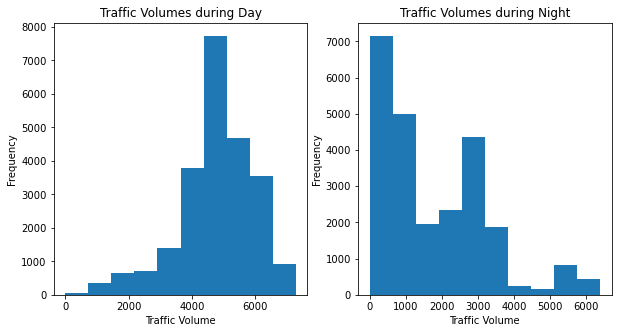

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(daytime_data["traffic_volume"])
plt.title("Traffic Volumes during Day")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(nighttime_data["traffic_volume"])
plt.title("Traffic Volumes during Night")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")

plt.show()

In [11]:
daytime_data["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
nighttime_data["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

* The histogram plotted for traffic volumes in the day is a left-skewed distribution, meaning that high traffic volumes are most frequent during the daytime.
* The histogram plotted for traffic volumes in the night is a right-skewed distribution, meaning that low traffic volumes are most frequent during the night.

As our goal is to find indicators of heavy traffic, we should not be using the nighttime data and rather focus our analysis on data that corresponds to day.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

#### **_Daytime Station Recordings_**

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

Finding average traffic volume for each month and visualizing it:

In [13]:
daytime_data['month']=daytime_data['date_time'].dt.month
daytime_data_grouped_by_month=daytime_data.groupby('month').mean()
daytime_data_grouped_by_month['traffic_volume']

<ipython-input-13-3103d9730b03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_data['month']=daytime_data['date_time'].dt.month


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

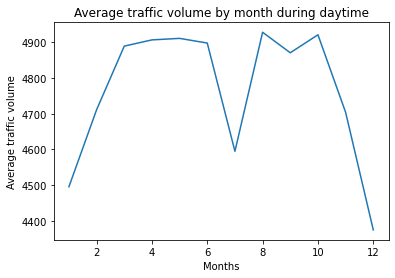

In [14]:
daytime_data_grouped_by_month["traffic_volume"].plot.line()
plt.title("Average traffic volume by month during daytime")
plt.xlabel("Months")
plt.ylabel("Average traffic volume")
plt.show()

The traffic is usually heavier during warm months (March–October, with exception of July) compared to cold months (November–February).

Finding average traffic volume for each day of the week and visualizing it:

In [15]:
daytime_data['day_of_the_week']=daytime_data['date_time'].dt.dayofweek
daytime_data_grouped_by_day_of_the_week=daytime_data.groupby('day_of_the_week').mean()
daytime_data_grouped_by_day_of_the_week['traffic_volume']

<ipython-input-15-aba28a9ce9f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_data['day_of_the_week']=daytime_data['date_time'].dt.dayofweek


day_of_the_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

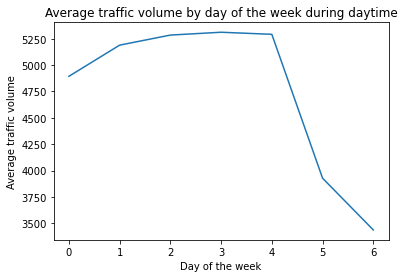

In [16]:
daytime_data_grouped_by_day_of_the_week["traffic_volume"].plot.line()
plt.title("Average traffic volume by day of the week during daytime")
plt.xlabel("Day of the week")
plt.ylabel("Average traffic volume")
plt.show()

Traffic volumes are high during the weekdays(Monday-Friday) and low during the weekend(Saturday and Sunday) in daytime

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [17]:
daytime_data['hour']=daytime_data['date_time'].dt.hour
weekday_daytime_data=daytime_data.loc[daytime_data['day_of_the_week']<5]
weekend_daytime_data=daytime_data.loc[daytime_data['day_of_the_week']>=5]

<ipython-input-17-616a2541b507>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_data['hour']=daytime_data['date_time'].dt.hour


In [18]:
weekday_daytime_data_grouped_by_hour=weekday_daytime_data.groupby('hour').mean()
weekday_daytime_data_grouped_by_hour

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_the_week
hour,,,,,,,
7,278.662639,0.145105,0.000068,50.538983,6030.413559,6.363390,1.984407
8,278.938443,0.144614,0.000135,53.666441,5503.497970,6.567659,1.989175
9,279.628421,0.156829,0.000139,53.619709,4895.269257,6.484386,1.981263
10,280.664650,0.113984,0.000033,54.781417,4378.419118,6.481283,1.957888
11,281.850231,0.151976,0.000000,52.808876,4633.419470,6.448819,1.979957
12,282.832763,0.090271,0.001543,53.855714,4855.382143,6.569286,1.989286
13,283.292447,0.092433,0.000370,53.325444,4859.180473,6.465237,1.982988
14,284.091787,0.102991,0.000746,55.326531,5152.995778,6.588318,1.990852
15,284.450605,0.090036,0.000274,54.168467,5592.897768,6.541397,1.962563


In [19]:
weekend_daytime_data_grouped_by_hour=weekend_daytime_data.groupby('hour').mean()
weekend_daytime_data_grouped_by_hour

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_the_week
hour,,,,,,,
7,278.095331,0.291540,0.000000,50.006623,1589.365894,6.518212,5.501656
8,277.981017,0.083870,0.000083,48.877076,2338.578073,6.523256,5.503322
9,279.785660,0.075234,0.000364,49.688042,3111.623917,6.603120,5.492201
10,280.403811,0.079674,0.000103,48.915808,3686.632302,6.491409,5.503436
11,282.129355,0.141387,0.000000,52.372973,4044.154955,6.482883,5.491892
12,282.936119,0.095784,0.000000,51.418018,4372.482883,6.500901,5.493694
13,283.784951,0.180452,0.000000,53.095841,4362.296564,6.580470,5.497288
14,284.663261,0.087847,0.000000,52.735401,4358.543796,6.644161,5.500000
15,284.854578,0.074771,0.000000,52.148624,4342.456881,6.612844,5.506422


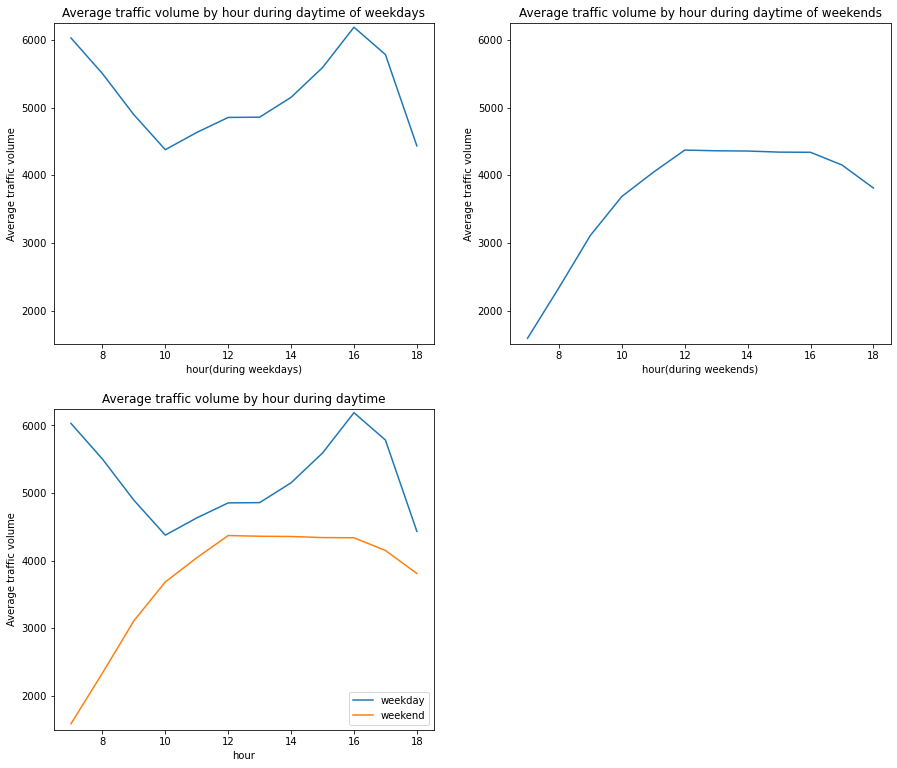

In [20]:
# visualising data in the form of a grid chart:

plt.figure(figsize=(15,13))
plt.subplot(2,2,1)
weekday_daytime_data_grouped_by_hour['traffic_volume'].plot.line()
plt.title('Average traffic volume by hour during daytime of weekdays')
plt.xlabel('hour(during weekdays)')
plt.ylabel('Average traffic volume')
plt.ylim([1500,6250])

plt.subplot(2,2,2)
weekend_daytime_data_grouped_by_hour['traffic_volume'].plot.line()
plt.title('Average traffic volume by hour during daytime of weekends')
plt.xlabel('hour(during weekends)')
plt.ylabel('Average traffic volume')
plt.ylim([1500,6250])

plt.subplot(2,2,3)
plt.plot(weekday_daytime_data_grouped_by_hour.index,weekday_daytime_data_grouped_by_hour['traffic_volume'], label='weekday')
plt.plot(weekend_daytime_data_grouped_by_hour.index,weekend_daytime_data_grouped_by_hour['traffic_volume'], label='weekend')
plt.title('Average traffic volume by hour during daytime')
plt.xlabel('hour')
plt.ylabel('Average traffic volume')
plt.ylim([1500,6250])
plt.legend()

plt.show()

* The traffic volumes on weekdays is always higher than the traffic during weekends at all times of the daytime.
* Lowest traffic volumes on weekdays daytime(at 10 am-10:59 am and 6 pm-6:59 pm) is greater than the highest traffic observed at daytime of weekends(12 pm -12:59 pm)
* Rush hours on business days(weekdays) are observed at 7 am to 7:59 am and at 4 pm to 4:59 pm. A probable explanation for this could be that office-goers go to work between 7-8 am in the morning and return from work between 4-5 pm in the evening using cars.
* Rush hours on weekends occur between 12 pm in the afternoon and 4pm in the evening. A probable reason could be that families use cars to travel to places of attraction during this time.

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [21]:
daytime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   month                23877 non-null  int64         
 10  day_of_the_week      23877 non-null  int64         
 11  hour                 23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 2.4+ MB


The quantitative variables include: temp, rain_1h, snow_1h, clouds_all

In [22]:
daytime_data.corr().loc["traffic_volume",["temp", "rain_1h", "snow_1h", "clouds_all"]]

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

weather column with the strongest correlation with traffic_volume is the temp column. Let's visualize the scatter plot to understand the relationship

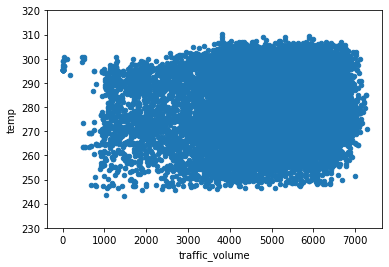

In [23]:
daytime_data.plot.scatter(x='traffic_volume', y='temp')
plt.ylim([230,320])
plt.show()

Previously, we examined the correlation between traffic_volume and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

In [24]:
print(daytime_data["weather_main"].describe())
daytime_data["weather_main"].value_counts().sort_index()

count      23877
unique        11
top       Clouds
freq        8702
Name: weather_main, dtype: object


Clear           5744
Clouds          8702
Drizzle          883
Fog              362
Haze             834
Mist            2593
Rain            2841
Smoke             12
Snow            1454
Squall             1
Thunderstorm     451
Name: weather_main, dtype: int64

In [25]:
print(daytime_data["weather_description"].describe())
daytime_data["weather_description"].value_counts().sort_index()

count            23877
unique              38
top       sky is clear
freq              4892
Name: weather_description, dtype: object


SQUALLS                                   1
Sky is Clear                            852
broken clouds                          2793
drizzle                                 278
few clouds                             1143
fog                                     362
freezing rain                             2
haze                                    834
heavy intensity drizzle                  29
heavy intensity rain                    219
heavy snow                              320
light intensity drizzle                 573
light intensity shower rain              10
light rain                             1707
light rain and snow                       4
light shower snow                        11
light snow                              978
mist                                   2593
moderate rain                           785
overcast clouds                        2585
proximity shower rain                   111
proximity thunderstorm                  303
proximity thunderstorm with driz

We're going to calculate the average traffic volume associated with each unique value in these two columns and create bar plots for the same.

In [26]:
daytime_data_grouped_by_main_weather=daytime_data.groupby('weather_main').mean()
daytime_data_grouped_by_main_weather

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_the_week,hour
weather_main,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,12.467626
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,6.734285,2.895102,11.078288
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,6.774023,2.914467,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,6.833333,2.416667,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,6.374828,2.750344,12.153370


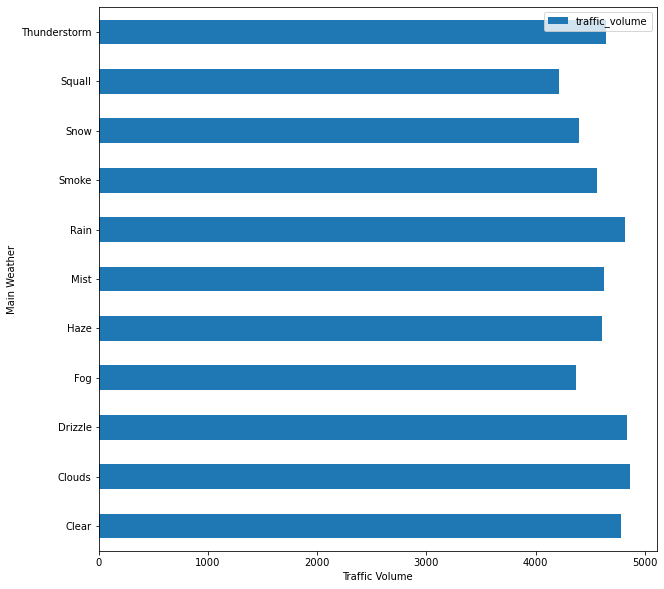

In [27]:
daytime_data_grouped_by_main_weather.plot.barh(y='traffic_volume', figsize=(10,10))
plt.xlabel("Traffic Volume")
plt.ylabel("Main Weather")
plt.show()

No traffic volume exceeds 5,000 cars for any weather type. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.

In [28]:
daytime_data_grouped_by_weather_description=daytime_data.groupby('weather_description').mean()
daytime_data_grouped_by_weather_description

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_the_week,hour
weather_description,,,,,,,,
SQUALLS,296.730000,1.020000,0.000000,75.000000,4211.000000,7.000000,2.000000,14.000000
Sky is Clear,293.232549,0.000000,0.000000,0.000000,4919.009390,7.557512,2.895540,12.453052
broken clouds,282.372927,0.000000,0.000000,72.635875,4824.130326,6.675260,2.998210,12.811314
drizzle,283.573777,0.145072,0.000000,88.589928,4737.330935,7.244604,3.028777,11.697842
few clouds,284.272965,0.000000,0.000000,19.391951,4839.818023,6.159230,2.977253,12.633421
fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,10.325967
freezing rain,272.860000,0.000000,0.000000,90.000000,4314.000000,6.500000,0.500000,13.500000
haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,12.467626
heavy intensity drizzle,285.467931,0.276207,0.000000,89.172414,4738.586207,7.551724,2.896552,12.275862


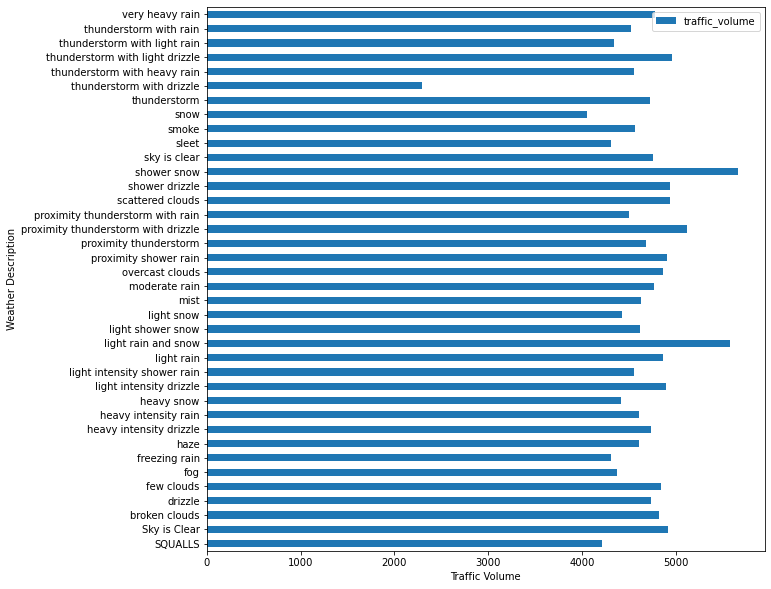

In [29]:
daytime_data_grouped_by_weather_description.plot.barh(y='traffic_volume', figsize=(10,10))
plt.xlabel("Traffic Volume")
plt.ylabel("Weather Description")
plt.show()

In weather conditions that include shower snow, proximity thunderstorm with drizzle, and light rain and snow, the traffic volumes exceed 5000.
It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

# Conclusions
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

* Time indicators
  * The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
  * The traffic is usually heavier on business days compared to the weekends.
  * On business days, the rush hours are around 7 and 16.
* Weather indicators
  * Shower snow
  * Light rain and snow
  * Proximity thunderstorm with drizzle

## Extra Analysis

#### **_Nightime Station Recordings_**

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

Finding average traffic volume for each month and visualizing it:

In [30]:
nighttime_data['month']=nighttime_data['date_time'].dt.month
nighttime_data_grouped_by_month=nighttime_data.groupby('month').mean()
nighttime_data_grouped_by_month['traffic_volume']

<ipython-input-30-d8cdb363e405>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nighttime_data['month']=nighttime_data['date_time'].dt.month


month
1     1616.610448
2     1716.961841
3     1817.272029
4     1786.116598
5     1829.852518
6     1932.272727
7     1838.349193
8     1897.564079
9     1818.959858
10    1852.168591
11    1680.311799
12    1622.508393
Name: traffic_volume, dtype: float64

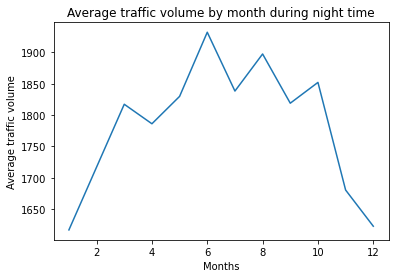

In [31]:
nighttime_data_grouped_by_month["traffic_volume"].plot.line()
plt.title("Average traffic volume by month during night time")
plt.xlabel("Months")
plt.ylabel("Average traffic volume")
plt.show()

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

Finding average traffic volume for each day of the week and visualizing it:

In [32]:
nighttime_data['day_of_the_week']=nighttime_data['date_time'].dt.dayofweek
nighttime_data_grouped_by_day_of_the_week=nighttime_data.groupby('day_of_the_week').mean()
nighttime_data_grouped_by_day_of_the_week['traffic_volume']

<ipython-input-32-c0033a510fd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nighttime_data['day_of_the_week']=nighttime_data['date_time'].dt.dayofweek


day_of_the_week
0    1722.532692
1    1862.926571
2    1901.465710
3    1994.177959
4    2059.882336
5    1634.459412
6    1323.998273
Name: traffic_volume, dtype: float64

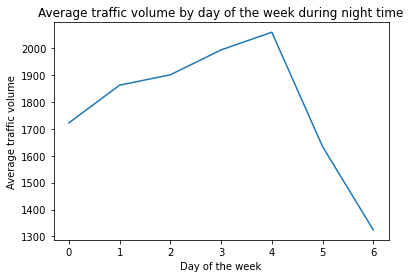

In [33]:
nighttime_data_grouped_by_day_of_the_week["traffic_volume"].plot.line()
plt.title("Average traffic volume by day of the week during night time")
plt.xlabel("Day of the week")
plt.ylabel("Average traffic volume")
plt.show()

Just like the findings in daytime, traffic volumes are high during the weekdays(Monday-Friday) and low during the weekend(Saturday and Sunday) in night time

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [34]:
nighttime_data['hour']=nighttime_data['date_time'].dt.hour
weekday_nighttime_data=nighttime_data.loc[nighttime_data['day_of_the_week']<5]
weekend_nighttime_data=nighttime_data.loc[nighttime_data['day_of_the_week']>=5]

<ipython-input-34-f917bc6e69c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nighttime_data['hour']=nighttime_data['date_time'].dt.hour


__NOTE : The hours are not in the correct order for visualising a line plot, so lets reorder it.__

In [35]:
nighttime_hour_series=list(range(19,24))
nighttime_hour_series.extend(list(range(0,7)))
nighttime_hour_series

[19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6]

In [36]:
weekday_nighttime_data_grouped_by_hour=weekday_nighttime_data.groupby('hour').mean()
weekday_nighttime_data_grouped_by_hour.reindex(index=nighttime_hour_series,copy=False)

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_the_week
hour,,,,,,,
19,283.439235,0.156652,0.000000,53.014184,3298.340426,6.460993,1.989362
20,282.617152,0.119718,0.000000,51.443583,2842.433004,6.515515,1.988717
21,281.830703,0.133628,0.000702,49.395088,2673.042807,6.422456,1.972632
22,280.982875,0.119544,0.000617,46.618080,2125.913104,6.437281,1.973371
23,280.385178,0.105409,0.000831,44.722752,1379.549728,6.470708,1.978883
0,279.983283,0.161295,0.000341,44.580777,651.528971,6.465576,1.980913
1,279.626900,0.106480,0.000421,44.255349,396.913043,6.407177,1.987578
2,279.453874,0.123588,0.000000,44.566323,301.982818,6.533333,1.997251
3,279.046059,0.182486,0.000110,43.596841,362.289835,6.461538,2.000687


In [37]:
weekend_nighttime_data_grouped_by_hour=weekend_nighttime_data.groupby('hour').mean()
weekend_nighttime_data_grouped_by_hour.reindex(index=nighttime_hour_series,copy=False)

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_the_week
hour,,,,,,,
19,283.463563,0.054773,0.0,49.558984,3220.234120,6.537205,5.499093
20,282.735770,0.099269,0.0,49.336898,2815.039216,6.534759,5.495544
21,281.869537,0.243178,0.0,48.258528,2658.445242,6.522442,5.508079
22,280.997060,0.083069,0.0,44.961199,2384.368607,6.530864,5.500882
23,280.401362,0.107168,0.0,41.103147,1699.050699,6.559441,5.500000
0,279.732900,0.059667,0.0,41.022807,1306.414035,6.470175,5.491228
1,279.308772,0.149817,0.0,40.515000,805.128333,6.586667,5.496667
2,279.081511,0.108245,0.0,38.783688,611.171986,6.537234,5.500000
3,278.668051,0.121828,0.0,39.759227,393.611599,6.541301,5.497364


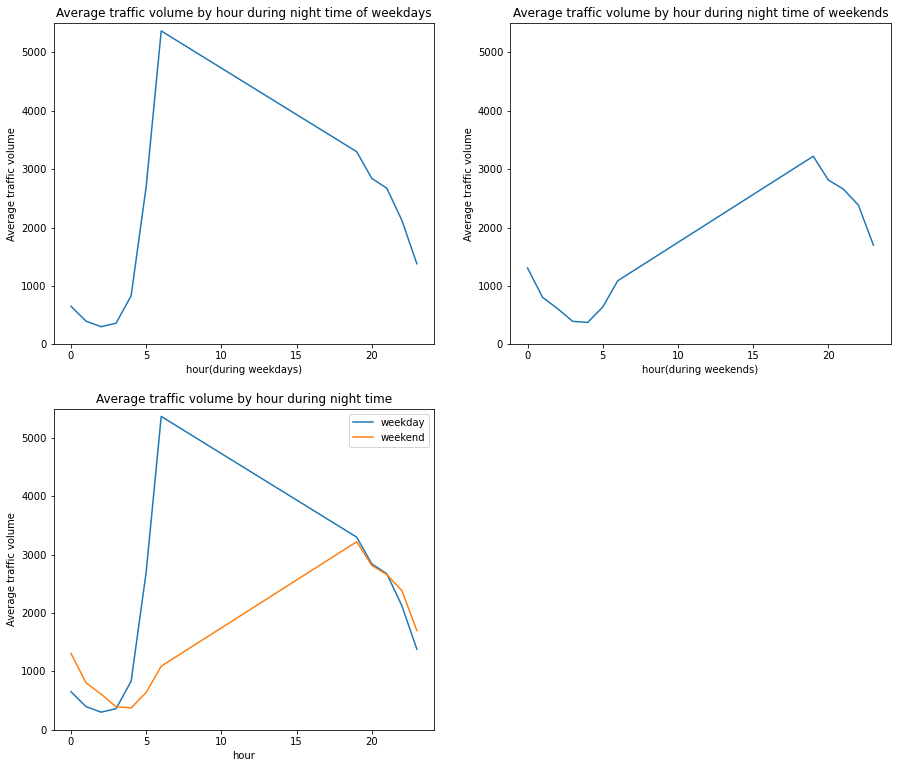

In [38]:
# visualising data in the form of a grid chart:

plt.figure(figsize=(15,13))
plt.subplot(2,2,1)
weekday_nighttime_data_grouped_by_hour['traffic_volume'].plot.line()
plt.title('Average traffic volume by hour during night time of weekdays')
plt.xlabel('hour(during weekdays)')
plt.ylabel('Average traffic volume')
plt.ylim([0,5500])

plt.subplot(2,2,2)
weekend_nighttime_data_grouped_by_hour['traffic_volume'].plot.line()
plt.title('Average traffic volume by hour during night time of weekends')
plt.xlabel('hour(during weekends)')
plt.ylabel('Average traffic volume')
plt.ylim([0,5500])

plt.subplot(2,2,3)
plt.plot(weekday_nighttime_data_grouped_by_hour.index,weekday_nighttime_data_grouped_by_hour['traffic_volume'], label='weekday')
plt.plot(weekend_nighttime_data_grouped_by_hour.index,weekend_nighttime_data_grouped_by_hour['traffic_volume'], label='weekend')
plt.title('Average traffic volume by hour during night time')
plt.xlabel('hour')
plt.ylabel('Average traffic volume')
plt.ylim([0,5500])
plt.legend()

plt.show()

* Rush hours on business days(weekdays) are observed at 6 am to 6:59 am and at 7 pm to 7:59 pm. A probable explanation for this could be that office-goers go to work between 6-7 am in the morning and return from work between 7-8 pm in the evening using cars.
* Rush hour on weekends occur between 7 pm-8 pm. A probable reason could be that families use cars to return to their homes after going out in the daytime.

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [39]:
nighttime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24327 entries, 10 to 48203
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              24327 non-null  object        
 1   temp                 24327 non-null  float64       
 2   rain_1h              24327 non-null  float64       
 3   snow_1h              24327 non-null  float64       
 4   clouds_all           24327 non-null  int64         
 5   weather_main         24327 non-null  object        
 6   weather_description  24327 non-null  object        
 7   date_time            24327 non-null  datetime64[ns]
 8   traffic_volume       24327 non-null  int64         
 9   month                24327 non-null  int64         
 10  day_of_the_week      24327 non-null  int64         
 11  hour                 24327 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 2.4+ MB


The quantitative variables include: temp, rain_1h, snow_1h, clouds_all

In [40]:
nighttime_data.corr().loc["traffic_volume",["temp", "rain_1h", "snow_1h", "clouds_all"]]

temp          0.094004
rain_1h      -0.012972
snow_1h      -0.007453
clouds_all    0.012832
Name: traffic_volume, dtype: float64

weather column with the strongest correlation with traffic_volume is the temp column. Let's visualize the scatter plot to understand the relationship

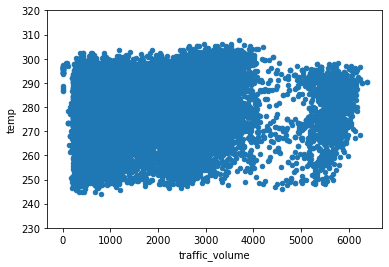

In [41]:
nighttime_data.plot.scatter(x='traffic_volume', y='temp')
plt.ylim([230,320])
plt.show()

Previously, we examined the correlation between traffic_volume and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

In [42]:
print(nighttime_data["weather_main"].describe())
nighttime_data["weather_main"].value_counts().sort_index()

count     24327
unique       11
top       Clear
freq       7647
Name: weather_main, dtype: object


Clear           7647
Clouds          6462
Drizzle          938
Fog              550
Haze             526
Mist            3357
Rain            2831
Smoke              8
Snow            1422
Squall             3
Thunderstorm     583
Name: weather_main, dtype: int64

In [43]:
print(nighttime_data["weather_description"].describe())
nighttime_data["weather_description"].value_counts().sort_index()

count            24327
unique              33
top       sky is clear
freq              6773
Name: weather_description, dtype: object


SQUALLS                                   3
Sky is Clear                            874
broken clouds                          1873
drizzle                                 373
few clouds                              813
fog                                     550
haze                                    526
heavy intensity drizzle                  35
heavy intensity rain                    248
heavy snow                              296
light intensity drizzle                 527
light intensity shower rain               3
light rain                             1665
light rain and snow                       2
light snow                              968
mist                                   3357
moderate rain                           879
overcast clouds                        2496
proximity shower rain                    25
proximity thunderstorm                  370
proximity thunderstorm with drizzle       7
proximity thunderstorm with rain         34
scattered clouds                

We're going to calculate the average traffic volume associated with each unique value in these two columns and create bar plots for the same.

In [44]:
nighttime_data_grouped_by_main_weather=nighttime_data.groupby('weather_main').mean()
nighttime_data_grouped_by_main_weather

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_the_week,hour
weather_main,,,,,,,,
Clear,279.745734,0.000000,0.000000,1.453903,1762.057277,6.488165,3.104747,10.344710
Clouds,279.495731,0.000000,0.000000,65.926029,1939.232745,6.274838,2.972764,11.869545
Drizzle,283.173188,0.145000,0.000000,80.074627,1834.920043,6.597015,2.797441,10.636461
Fog,280.624182,0.036436,0.000109,42.296364,1605.365455,6.727273,3.063636,6.456364
Haze,276.610133,0.057700,0.000000,50.220532,1745.640684,5.648289,2.914449,9.946768
Mist,279.520200,0.229333,0.000652,59.000596,1626.786119,6.761692,2.912720,8.273756
Rain,286.869183,0.583193,0.000081,69.317909,1814.952314,6.815966,2.906747,10.623101
Smoke,288.710000,0.000000,0.000000,53.375000,1247.250000,5.500000,3.750000,7.500000
Snow,267.925211,0.036681,0.001540,82.450774,1606.324191,6.182138,2.832630,10.015471


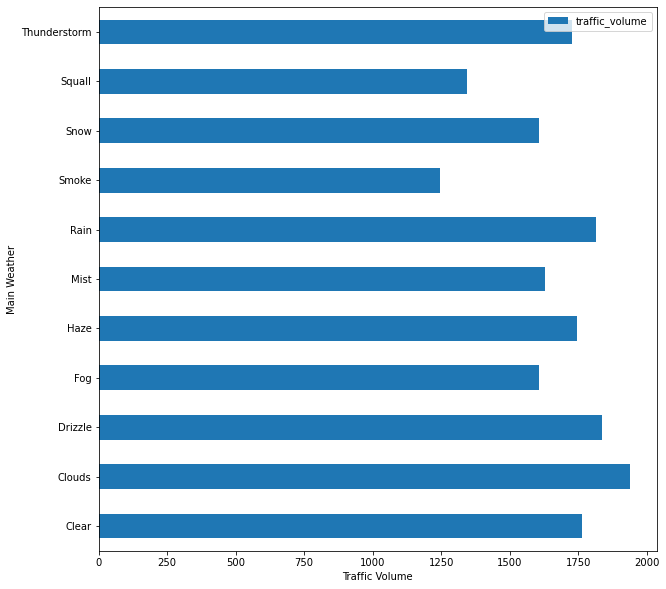

In [45]:
nighttime_data_grouped_by_main_weather.plot.barh(y='traffic_volume', figsize=(10,10))
plt.xlabel("Traffic Volume")
plt.ylabel("Main Weather")
plt.show()

No traffic volume exceeds 5,000 cars for any weather type. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.

In [46]:
nighttime_data_grouped_by_weather_description=nighttime_data.groupby('weather_description').mean()
nighttime_data_grouped_by_weather_description

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_the_week,hour
weather_description,,,,,,,,
SQUALLS,290.940000,4.303333,0.000000,76.333333,1345.333333,6.333333,4.333333,8.666667
Sky is Clear,288.472426,0.000000,0.000000,0.000000,1964.941648,7.596110,2.885584,10.990847
broken clouds,279.423389,0.000000,0.000000,71.767218,1926.904965,6.631073,2.923118,11.971703
drizzle,282.582440,0.099062,0.000000,84.302949,1870.710456,6.410188,2.898123,10.415550
few clouds,283.925322,0.000000,0.000000,19.207872,2076.963100,6.306273,3.008610,12.765068
fog,280.624182,0.036436,0.000109,42.296364,1605.365455,6.727273,3.063636,6.456364
haze,276.610133,0.057700,0.000000,50.220532,1745.640684,5.648289,2.914449,9.946768
heavy intensity drizzle,284.825143,0.082286,0.000000,86.285714,2238.057143,6.857143,3.028571,9.885714
heavy intensity rain,290.411048,2.644395,0.000000,76.306452,1841.717742,7.221774,2.633065,9.649194


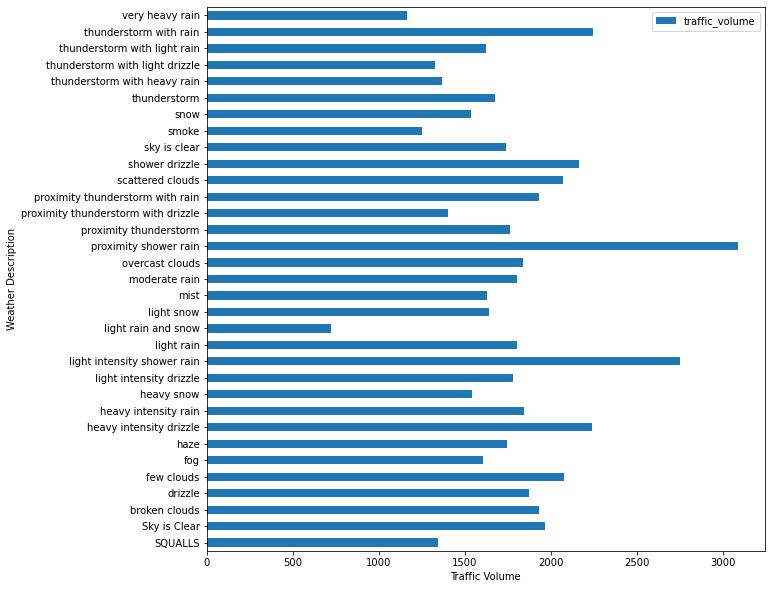

In [47]:
nighttime_data_grouped_by_weather_description.plot.barh(y='traffic_volume', figsize=(10,10))
plt.xlabel("Traffic Volume")
plt.ylabel("Weather Description")
plt.show()

In weather conditions that include thunderstorm with rain, shower drizzle, scattered clouds, proximity shower rain, light intensity shower rain, heavy intensity drizzle, and few clouds, the traffic volumes exceed 2000.
It's not clear why these weather types have the highest average traffic values — this is bad weather(except scattered clouds and few clouds), but not that bad. Perhaps more people take their cars out of the garage when the weather(it is drizzling/raining) is bad or when weather is about to turn bad(scattered clouds and few clouds) instead of riding a bike or walking.

#### Conclusions
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

* Time indicators
  * The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
  * The traffic is usually heavier on business days compared to the weekends.
  * Rush hours on business days(weekdays) are observed at 6 am to 6:59 am and at 7 pm to 7:59 pm. A probable explanation for this could be that office-goers go to work between 6-7 am in the morning and return from work between 7-8 pm in the evening using cars.
  * Rush hour on weekends occur between 7 pm-8 pm. A probable reason could be that families use cars to return to their homes after going out in the daytime.

* Weather indicators
  * thunderstorm with rain
  * shower drizzle
  * scattered clouds
  * proximity shower rain 
  * light intensity shower rain 
  * heavy intensity drizzle
  * few clouds

#### **_Finding more time and weather indicators for heavy traffic_**

Time indicators:

In [48]:
#checking for year as a time indicator
station_recordings_copy=station_recordings
station_recordings_copy['year']=station_recordings_copy['date_time'].dt.year
station_recordings_group_by_year=station_recordings_copy.groupby('year').mean()
station_recordings_group_by_year['traffic_volume']

year
2012    3207.802657
2013    3286.762160
2014    3250.938004
2015    3242.900983
2016    3169.441328
2017    3340.703065
2018    3260.112341
Name: traffic_volume, dtype: float64

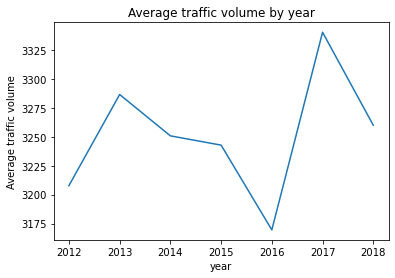

In [49]:
station_recordings_group_by_year['traffic_volume'].plot.line()
plt.title('Average traffic volume by year')
plt.ylabel('Average traffic volume')
plt.show()

The traffic volume peaked in 2013 and 2018 again. In 2016, traffic was the lowest recorded. Overall though, year cannot be directly taken as an indicator of heavy traffic as there is regular trend(say, monotonically increasing) 

Lets check average yearly traffic volumes based on daytimes and nighttimes throughout the years passed by, to get a better picture inorder to confirm if year can be considered as a time indicator.

In [50]:
daytime_data['year']=daytime_data['date_time'].dt.year
daytime_data_grouped_by_year=daytime_data.groupby('year').mean()
daytime_data_grouped_by_year["traffic_volume"]

<ipython-input-50-96153fc64742>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_data['year']=daytime_data['date_time'].dt.year


year
2012    4675.346861
2013    4834.084298
2014    4765.309296
2015    4748.448485
2016    4637.518293
2017    4865.961752
2018    4726.280534
Name: traffic_volume, dtype: float64

In [51]:
nighttime_data['year']=nighttime_data['date_time'].dt.year
nighttime_data_grouped_by_year=nighttime_data.groupby('year').mean()
nighttime_data_grouped_by_year["traffic_volume"]

<ipython-input-51-fe4e8d8540a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nighttime_data['year']=nighttime_data['date_time'].dt.year


year
2012    1678.183559
2013    1776.179115
2014    1762.013115
2015    1793.439856
2016    1739.358719
2017    1857.150670
2018    1796.524133
Name: traffic_volume, dtype: float64

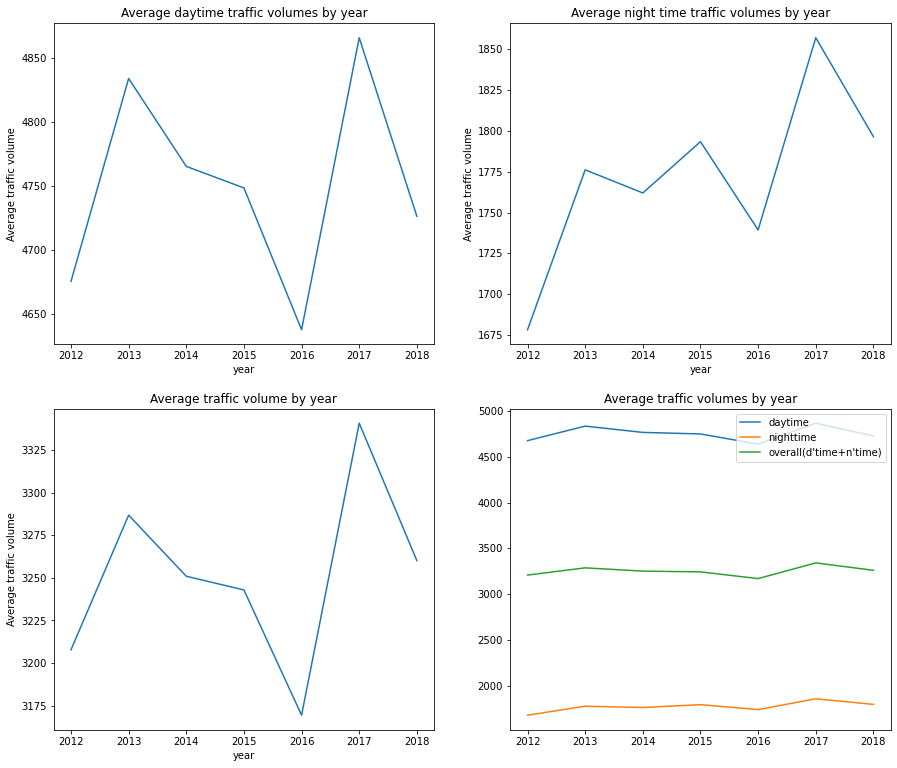

In [52]:
plt.figure(figsize=(15,13))

plt.subplot(2,2,1)
daytime_data_grouped_by_year["traffic_volume"].plot.line()
plt.title('Average daytime traffic volumes by year')
plt.ylabel('Average traffic volume')

plt.subplot(2,2,2)
nighttime_data_grouped_by_year["traffic_volume"].plot.line()
plt.title('Average night time traffic volumes by year')
plt.ylabel('Average traffic volume')

plt.subplot(2,2,3)
station_recordings_group_by_year['traffic_volume'].plot.line()
plt.title('Average traffic volume by year')
plt.ylabel('Average traffic volume')

plt.subplot(2,2,4)
plt.plot(daytime_data_grouped_by_year.index,daytime_data_grouped_by_year["traffic_volume"],label="daytime")
plt.plot(nighttime_data_grouped_by_year.index,nighttime_data_grouped_by_year["traffic_volume"],label="nighttime")
plt.plot(station_recordings_group_by_year.index,station_recordings_group_by_year["traffic_volume"],label="overall(d'time+n'time)")
plt.title("Average traffic volumes by year")
plt.legend()

plt.show()